## Лабораторная работа №14. Иерархическая кластеризация.

Используемый набор данных: [Wine](https://archive.ics.uci.edu/ml/datasets/Wine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score,    completeness_score, v_measure_score, silhouette_score)
from scipy.cluster.hierarchy import dendrogram
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine"
downloadFile(url + "/wine.data", "dataset/wine.data")
downloadFile(url + "/wine.names", "dataset/wine.names")

In [3]:
headers = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]  
data = pd.read_csv("dataset/wine.data", names=headers)
data["Class"] = data["Class"].astype("category")
data.sample(20)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
138,3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515
77,2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500
154,3,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
90,2,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480
133,3,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600
147,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625


In [4]:
display(data.describe())
display(data.isna().sum())

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Подготовим данные для [кластеризации](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering): выберем признаки и метки и сформируем тренировочные и тестовые наборы.

In [5]:
X = data.drop(columns=["Class"]).copy()

ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ac.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

Выполним визуализацию с помощью [дендрограммы](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).

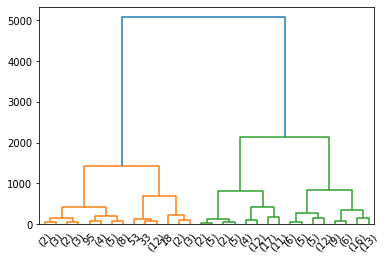

In [6]:
def draw_dendrogram(ac):
    counts = np.zeros(ac.children_.shape[0])
    n_samples = len(ac.labels_)
    for i, merge in enumerate(ac.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([ac.children_, ac.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, truncate_mode='level', p=4)

draw_dendrogram(ac)

Выполним [оценку качества](https://habr.com/ru/company/ods/blog/325654/) получившейся сегментации.

In [7]:
y = data["Class"].copy()
scores = [{
    'ARI': adjusted_rand_score(y, ac.labels_),
    'AMI': adjusted_mutual_info_score(y, ac.labels_),
    'Homogenity': homogeneity_score(y, ac.labels_),
    'Completeness': completeness_score(y, ac.labels_),
    'V-measure': v_measure_score(y, ac.labels_)
}]
columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure']
pd.DataFrame(data=scores, columns=columns, index=["Hierarchical"])

,ARI,AMI,Homogenity,Completeness,V-measure
Hierarchical,0.0,2.678146e-14,1.0,0.209588,0.346544
